In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import gc
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras.backend as K

import cv2

import open3d as o3

from functools import partial

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split

from keras.models import *
from keras.layers import *
from keras.losses import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
read_path_0 = "data_generator/data/ori/c_socket/c_socket18_part0.txt"
read_path_1 = "data_generator/data/ori/c_socket/c_socket18_part1.txt"
read_path_2 = "data_generator/data/ori/c_socket/c_socket18_part2.txt"
read_path_3 = "data_generator/data/ori/c_socket/c_socket18.pcd"


In [11]:

pcd_0 = o3.read_point_cloud(read_path_3)
pcd = np.asarray(pcd_0.points)

In [12]:
data = np.loadtxt(read_path_0)
data1 = np.loadtxt(read_path_1)
data2 = np.loadtxt(read_path_2)

In [14]:
data.shape, data1.shape, data2.shape, pcd.shape

((50, 3), (50, 3), (50, 3), (1322, 3))

In [18]:
data_0 = data.reshape(-1, 3)


Text(0.5, 0.92, 'register')

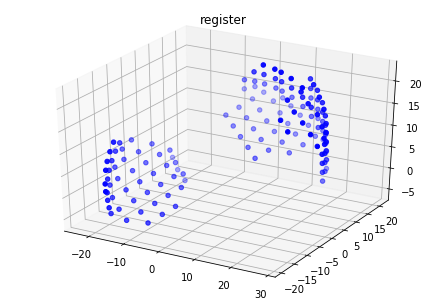

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
data_0 = data.reshape(-1, 3)

x = data_0[:, 0]
y = data_0[:, 1]
z = data_0[:, 2]

ax.scatter(x, y, z, c='b', marker='o')


data_1 = data1.reshape(-1, 3)

x = data_1[:, 0]
y = data_1[:, 1]
z = data_1[:, 2]

ax.scatter(x, y, z, c='b', marker='o')



data_2 = data2.reshape(-1, 3)

x = data_2[:, 0]
y = data_2[:, 1]
z = data_2[:, 2]

ax.scatter(x, y, z, c='b', marker='o')



# data_3 = pcd.reshape(-1, 3)

# x = data_3[:, 0]
# y = data_3[:, 1]
# z = data_3[:, 2]

# ax.scatter(x, y, z, c='g', marker='o')

ax.set_title('c_socket')

In [26]:
data.shape
xyz = data.reshape(-1, 3) # get the points from mesh

In [18]:
np.savetxt("test.txt", xyz) # save files for txt (.stem means to clear the semifiles) 
pcd = o3.read_point_cloud( "test.txt", format='xyz') 

In [20]:
o3.visualization.draw_geometries([pcd, downpcd_1])


In [9]:
voxel_size = 3.5
pcd_0 = o3.read_point_cloud(str(read_path_0), format='xyz')
downpcd_0 = o3.voxel_down_sample(pcd_0, voxel_size=voxel_size)

voxel_size = 3.5
pcd_1 = o3.read_point_cloud(str(read_path_1))
downpcd_1 = o3.voxel_down_sample(pcd_1, voxel_size=voxel_size)


In [4]:
o3.visualization.draw_geometries([downpcd_0, downpcd_1])

In [10]:
downpcd_0, downpcd_0

(geometry::PointCloud with 0 points., geometry::PointCloud with 0 points.)

In [17]:
apcd_0 = np.asarray(downpcd_0.points)
apcd_1 = np.asarray(downpcd_1.points)

In [19]:
apcd_0.shape

(1739, 3)

Text(0.5, 0.92, 'register')

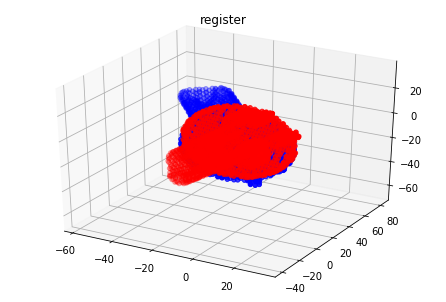

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
data_ = apcd_0.reshape(-1, 3)

x = data_[:, 0]
y = data_[:, 1]
z = data_[:, 2]

ax.scatter(x, y, z, c='r', marker='o')


data_ = apcd_1.reshape(-1, 3)

x = data_[:, 0]
y = data_[:, 1]
z = data_[:, 2]

ax.scatter(x, y, z, c='b', marker='o')
ax.set_title('register')